# Analyze bookstore sales with Python

## <i>Customer behavior analysis</i>

My mission here for Lapage is to analyse the strengths, weaknesses and customer behavior of Lapage.

I was also asked to analyze the relationship between a customer's gender and the categories of books purchased, and then the link between the customers'age and the total amount of purchases, the purchase frequency, the average basket size and the categories of books purchased.
 <br></br>
 
<u> Summary</u> :

 Tools
 

III. Customer behavior analysis
    1. Relationship between customer's gender and purchase category
    -- a. Contingency table and heatmap
    -- b. Chi-square test
    2. Analysis of customer behavior according to their age
    -- a. Calculations and pearson matrix
    -- b. Customers' age vs purchase frequency
    -- c. Customers' age vs total purchase amount
    -- d. Customers' age vs average basket
    -- e. Customers' age vs category of books purchased

 Conclusion (part 3) 

<a id='another_cell_0'></a>

### Tools

In [1]:
import math
import scipy.stats as st #shapiro and spearman tests
import statsmodels.api as sm #pvalue
import pingouin as pg #anova test
import statsmodels.api as sm #anova test
import statsmodels.formula.api as smf #anova test
from statsmodels.formula.api import ols #anova tes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

In [2]:
#shapiro-wilk test
def shapiro_test(x):
    from scipy.stats import shapiro
    x1, pval1 = shapiro(x)

    print("="*100,"\n")
    print("Shapiro-Wilk test")
    if pval1 < 0.05:
        print("The null hypothesis is rejected \t ==> The variable does not follow a normal law")
    else:
        print("We cannot reject the null hypothesis H0 (The variable follows a normal law)")
    print()
    print("="*100,"\n")
    
#spearman test
def spearman_test(x,y):
    print("="*100, "\n")
    print("Test of Independence (Spearman's Test)\n")

    rs = st.spearmanr(x,y)[0]
    pvalue = st.spearmanr(x,y)[1]

    if abs(rs) < .10:
        qual = 'negligible (or null)'
    elif abs(rs) < .20:
        qual = 'low'
    elif abs(rs) < .40:
        qual = 'moderate'
    elif abs(rs) < .60:
        qual = 'rather high'
    elif abs(rs) < .80:
        qual = 'high'
    else:
        qual = 'very high'

    print("Spearman coeff =",rs)
    print("Spearman pvalue =",pvalue)
    print()

    if rs == 0:
        print("We cannot reject the null hypothesis H0 (the variables are independent)")
    elif rs < 0 :
        if pvalue < 0.05:
            print("Variables exhibit a significantly {} negative correlation".format(qual))
        else:
            print("The variables have a low significant {} negative correlation".format(qual))
    elif rs > 0:
        if pvalue < 0.05:
            print("The variables exhibit a significantly {} positive correlation".format(qual))
        else:
            print("The variables have a low significant {} positive correlation".format(qual))

In [3]:
lapage_df_b2c = pd.read_csv('export_lapage_df_b2c.csv', sep=';')#lapage b2c database importation
lapage_df_b2c['date'] = pd.to_datetime(lapage_df_b2c['date'])#date convertion
lapage_df_b2c.drop('Unnamed: 0', 1, inplace=True)#we delete the first empty column of the dataframe
lapage_df_b2c

,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ,age_groups
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,36,4.18,0,36 - 45 ans
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,34,15.99,1,26 - 35 ans
2,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,22,69.99,2,18 - 25 ans
3,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,42,4.99,0,36 - 45 ans
4,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,2022-10-20,2022,2022-10,f,1972,50,8.57,0,46 - 55 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612621,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022,2022-01,f,1951,71,12.99,0,66 - 75 ans
612622,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022,2022-03,f,1977,45,10.99,1,36 - 45 ans
612623,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022,2022-12,f,1988,34,12.99,0,26 - 35 ans
612624,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021,2021-07,m,1986,36,4.98,0,36 - 45 ans


## III. Customer behavior analysis

### 1. Relationship between customer's gender and purchase category

<a id='another_cell_e'></a>

#### a. Contingency table between sex and category and heatmap

In [4]:
#contingency table between sex and category
X, Y = "sex", "categ"
cont_table = lapage_df_b2c[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont_table

categ,0,1,2
sex,,,
f,192025,110550,16429
m,178044,100227,15351


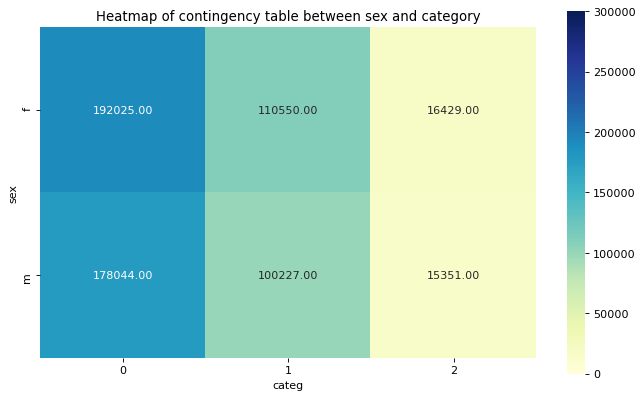

In [5]:
#heatmap of contingency table between sex and category
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(cont_table, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=300000.0)
plt.title("Heatmap of contingency table between sex and category",fontsize=12)
plt.savefig("Heatmap of contingency table between sex and category.png", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><li> Woman as men prefer respectively categories 0, 1 and 2 at last</li>
    <i><li> Purchase categories do not differ by customer gender</li>
    <i><li> We only see that women consume a little more than men on the 3 categories of products</li>
</i></div>

<a id='another_cell_f'></a>

#### b. Chi-square test

The chi-square test is a statistical test that will make it possible to decide on the link between two qualitative variables. How can we say that the two variables in our distribution are not independent? In other words, how do we know if two variables have no statistical relationship between them ?

<b>Situation</b> : qualitative variable <i>(sex)</i> vs qualitative variable <i>(category)</i>
<br><b>Question</b> : <i>Has the category of books purchased a dependency on the customers gender ?</i></br>
<br><b>Tool</b> : chi-square test</br>

In [6]:
#chi-square independence test
print("="*100,"\n")
print("Independence test between gender and category (Chi-square test)")
print("\t Null hypothesis H0 : \t \t Preference for a book category does not depend on the customer's gender")
print("\t Alternative hypothesis H1 : \t Preference for a category depends on the customer's gender")
print('')

#chi-square and p-value calculation
conti = lapage_df_b2c[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(conti)
print("Le khi-deux est de : ",st_chi2,"\n")
print("La p-value est de :",st_p,"\n")

if st_p < 0.05:
    print("The null hypothesis is rejected \t ==> H1: The preference for a category depends on the gender of the customer")
else:
    print("We cannot reject the null hypothesis H0 (The preference for a category of book does not depend on the gender of the customer")


Independence test between gender and category (Chi-square test)
	 Null hypothesis H0 : 	 	 Preference for a book category does not depend on the customer's gender
	 Alternative hypothesis H1 : 	 Preference for a category depends on the customer's gender

Le khi-deux est de :  18.75788251563821 

La p-value est de : 8.448460261159054e-05 

The null hypothesis is rejected 	 ==> H1: The preference for a category depends on the gender of the customer


<div class="alert-success">
    <u>Notice</u> :
    <i><li> For α = 5%, the customers gender has a dependency on the category of books purchased</li>
</i></div>

### 2. Analysis of customer behavior according to their age

<a id='another_cell_h'></a>

#### a. Calculations and pearson matrix

In [7]:
#lapage_df_b2c group by age and age_groups
lapage_df_b2c_age = lapage_df_b2c.groupby(["age", "age_groups",]).agg({"id_prod":"count","price":"sum"}).reset_index()
lapage_df_b2c_age.rename(columns={"price":"total_purchase_amount", "id_prod":"purchase_frequency"}, inplace=True)

#calculation of "total purchase amount", "purchase frequency" and "average basket" variables for B2C customers
lapage_df_b2c_age["average_basket"] = round(lapage_df_b2c_age["total_purchase_amount"] / lapage_df_b2c_age["purchase_frequency"],2)
lapage_df_b2c_age["purchase_frequency"].isin(lapage_df_b2c_age["age"]==40)
lapage_df_b2c_age


,age,age_groups,purchase_frequency,total_purchase_amount,average_basket
0,18,18 - 25 ans,14769,591414.23,40.04
1,19,18 - 25 ans,4238,172831.75,40.78
2,20,18 - 25 ans,4468,178799.11,40.02
3,21,18 - 25 ans,4161,174347.66,41.90
4,22,18 - 25 ans,4299,160576.49,37.35
...,...,...,...,...,...
71,89,76 ans - plus,315,5089.62,16.16
72,90,76 ans - plus,293,4803.64,16.39
73,91,76 ans - plus,164,2691.19,16.41
74,92,76 ans - plus,222,3959.24,17.83


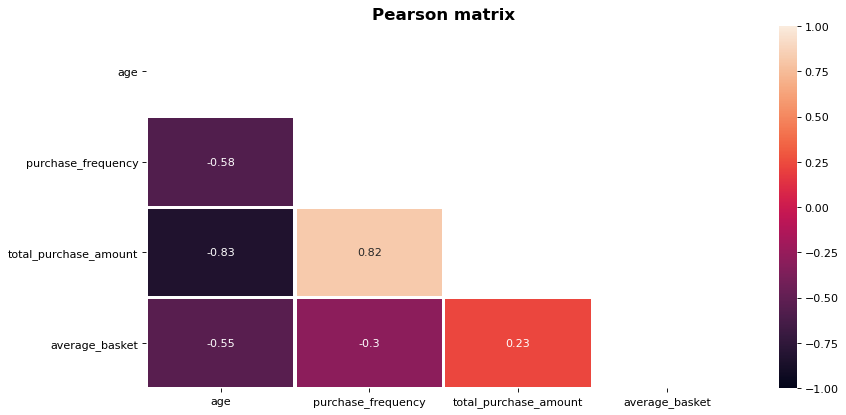

In [8]:
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
mask = np.triu(np.ones_like(lapage_df_b2c_age.corr(), dtype=bool))
sns.heatmap(lapage_df_b2c_age.corr(), mask=mask, vmin=-1, vmax=1, annot=True, linewidths=2)
plt.savefig("Part3 Pearson matrix", bbox_inches='tight')
plt.title("Pearson matrix", fontsize = 15, fontweight='bold');

<div class="alert-success">
    <u>Notice</u> :
    <i><li> There seems to be a high degree of negative correlation between the customer's age and their total purchase amount, purchase frequency and average basket respectively</li>
</i></div>

<a id='another_cell_i'></a>

#### b. Customers' age vs purchase frequency

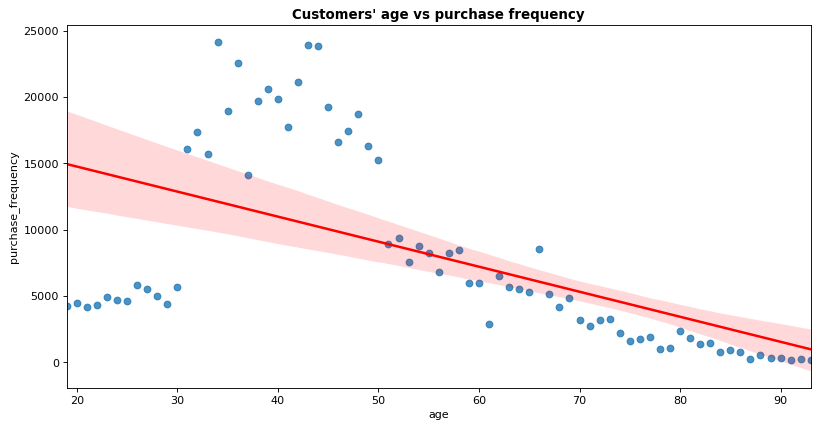

In [9]:
#scatter plot
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
line_kws = {'color' : 'r',}
sns.regplot(data=lapage_df_b2c_age[lapage_df_b2c_age["age"] > 18], x= "age",y = "purchase_frequency", line_kws=line_kws)
plt.title("Customers' age vs purchase frequency",fontsize = 12, fontweight='bold')
plt.savefig("Part3 Customers' age vs purchase frequency", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><li> From a general point of view, the frequency of purchases decreases with age</li>
</i></div>

- <b>Shapiro-wilk (normal law) and Spearman tests</b>

The Shapiro–Wilk test can be used to decide whether or not a sample fits a normal distribution, and it is commonly used for small samples.

<b>Situation</b> : ordinal variable <i>(age)</i> and quantitative variable <i>(frequency of purchases)</i>
<br><b>Question</b> : <i>Is the frequency of purchases follow a normal law ?</i></br>
<br><b>Tool</b> : shapiro-wilk test

In [10]:
#shapiro test
shapiro_test(lapage_df_b2c_age["purchase_frequency"])
shapiro_test(lapage_df_b2c_age["age"])


Shapiro-Wilk test
The null hypothesis is rejected 	 ==> The variable does not follow a normal law



Shapiro-Wilk test
The null hypothesis is rejected 	 ==> The variable does not follow a normal law




<div class="alert-danger">
    <u>Notice</u> :
    <i><li> The frequency of purchase and the customers' age do not follow a normal law → Spearman test</li>
</i></div>

Spearman correlation is often used to evaluate relationships involving ordinal variables.

In [11]:
#spearman test
spearman_test(lapage_df_b2c_age["age"],lapage_df_b2c_age["purchase_frequency"])


Test of Independence (Spearman's Test)

Spearman coeff = -0.6737935748462065
Spearman pvalue = 2.5520940213877932e-11

Variables exhibit a significantly high negative correlation


<div class="alert-success">
    <u>Notice</u> :
    <i><li> Customers' age and their purchase frequency are negatively correlated, which means here : the older the customer, the less frequently he buys</li>
</i></div>

<a id='another_cell_j'></a>

#### c. Customers' age vs total purchase amount

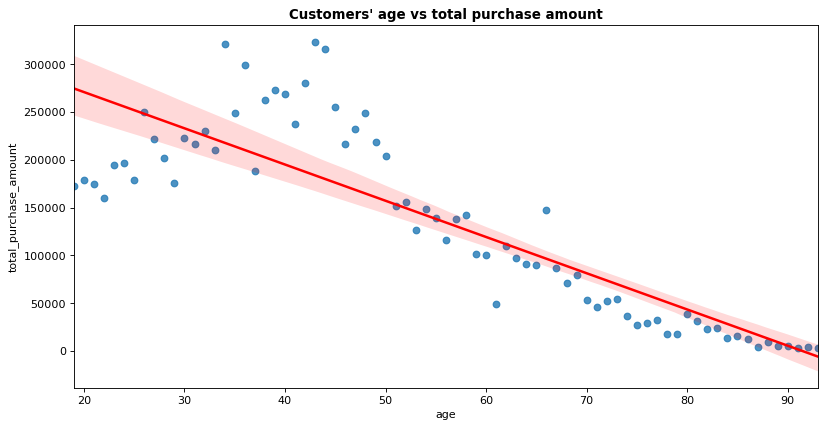

In [12]:
#scatter plot
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
line_kws = {'color' : 'r',}
sns.regplot(data=lapage_df_b2c_age[lapage_df_b2c_age["age"] > 18], x= "age",y = "total_purchase_amount", line_kws=line_kws)
plt.title("Customers' age vs total purchase amount",fontsize = 12, fontweight='bold')
plt.savefig("Part3 Customers' age vs total purchase amount", bbox_inches='tight')
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><li> From a general point of view, the total purchase amount decreases with age (even if it is positive up to 40 years old)</li>
</i></div>

<b>Situation</b> : ordinal variable <i>(age)</i> and quantitative variable <i>(total purchase amount)</i>
<br><b>Question</b> : <i>Is the total purchase amount follow a normal law ?</i></br>
<br><b>Tool</b> : shapiro-wilk test

In [13]:
#shapiro test
shapiro_test(lapage_df_b2c_age["total_purchase_amount"])


Shapiro-Wilk test
The null hypothesis is rejected 	 ==> The variable does not follow a normal law




<div class="alert-danger">
    <u>Notice</u> :
    <i><li> The total purchase amount do not follow a normal law → Spearman test</li>
</i></div>

In [14]:
#spearman test
spearman_test(lapage_df_b2c_age["age"],lapage_df_b2c_age["total_purchase_amount"])


Test of Independence (Spearman's Test)

Spearman coeff = -0.8740396445659603
Spearman pvalue = 6.668764227215192e-25

Variables exhibit a significantly very high negative correlation


<div class="alert-success">
    <u>Notice</u> :
    <i><li> Customers' age and their total purchase amount are very negatively correlated, which means here : the older the customer, the less he buys</li>
</i></div>

<a id='another_cell_k'></a>

#### d. Customers' age vs average basket

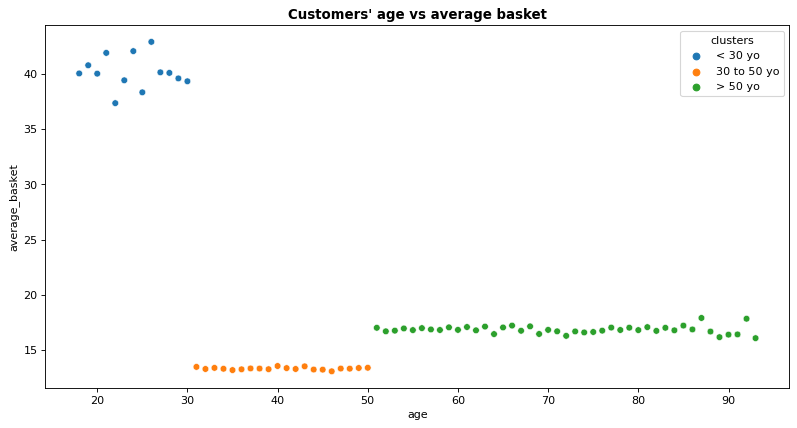

In [15]:
#scatter plot
fig = plt.figure(num=None, figsize=(12, 6), dpi=80)
lapage_df_b2c_age["clusters"]= pd.cut(lapage_df_b2c_age["age"], bins=[15,30,50,100], labels=["< 30 yo","30 to 50 yo","> 50 yo"])
sns.scatterplot(data=lapage_df_b2c_age, x="age", y="average_basket", hue="clusters")
plt.title("Customers' age vs average basket",fontsize = 12, fontweight='bold');

<div class="alert-success">
    <u>Notice</u> :
    <br>For customers...</br>
    <i><br><li> <b>... under 30 years old</b> : high average basket (more than 35 euros)</br></li>
    <i><li> <b>... between 30 and 50 years old</b> : low average basket (less than 15 euros)</li>
    <i><li> <b>... over 50 years old</b> : average basket between 15 and 20 euros</li>
</i></div>

<b>Situation</b> : ordinal variable <i>(age)</i> and quantitative variable <i>(average basket)</i>
<br><b>Question</b> : <i>Is the average basket follow a normal law ?</i></br>
<br><b>Tool</b> : shapiro-wilk test

In [16]:
#shapiro test
shapiro_test(lapage_df_b2c_age["average_basket"])


Shapiro-Wilk test
The null hypothesis is rejected 	 ==> The variable does not follow a normal law




- <b>The Kolmogorov-Smirnov test</b>

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution functions of two samples.

<b>Question</b> : <i>Do the customers' age and the purchase frequency have the same distribution ?</i>
<br><b>Tool</b> : kolmogorov-smirnov test</br>

In [17]:
#K-S test
from scipy.stats import ks_2samp
ks_2samp(lapage_df_b2c_age["age"], lapage_df_b2c_age["average_basket"])

KstestResult(statistic=0.8289473684210527, pvalue=1.1874582768381313e-26)

<div class="alert-warning">
    <u>Warning</u> :
    <i><li> From the output we can see that the test statistic is 0.8289473684210527 and the corresponding p-value is 1.1874582768381313e-26. Since the p-value is less than .05, we reject the null hypothesis.</li>
    <i><li> We have sufficient evidence to say that the two sample datasets do not come from the same distribution.</li>
</i></div>

<div class="alert-danger">
    <u>Notice</u> :
    <i><li> The average basket do not follow a normal law → Spearman test</li>
</i></div>

In [18]:
#spearman test
spearman_test(lapage_df_b2c_age["age"],lapage_df_b2c_age["average_basket"])


Test of Independence (Spearman's Test)

Spearman coeff = -0.08771678004687013
Spearman pvalue = 0.45116290359328837

The variables have a low significant negligible (or null) negative correlation


<div class="alert-success">
    <u>Notice</u> :
    <i><li> The relationship between customers' age and the average basket is not significant</li>
</i></div>

<a id='another_cell_l'></a>

#### e. Customers' age vs category of books purchased

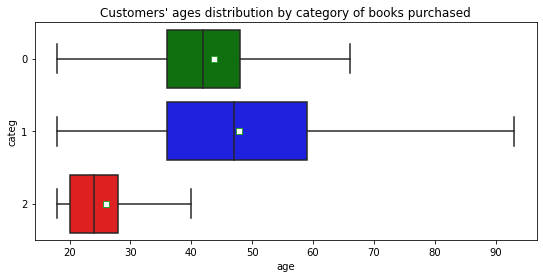

In [19]:
#box plot
plt.figure(figsize=(9,4))
palette = ['g','b','r']
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=lapage_df_b2c, y='categ', x='age', orient='h', showfliers=False, showmeans=True, palette=palette, meanprops=meanprops)
plt.title("Customers' ages distribution by category of books purchased")
plt.show()

<div class="alert-success">
    <u>Notice</u> :
    <i><br><li> <b>Category 0</b> : Customers aged 18 to 67 years old (with an approximative average age of 45 years old)</br></li>
    <i><li> <b>Category 1</b> : Everybody (with an approximative average age of 48 years old)</li>
    <i><li> <b>Category 2</b> : Customers aged 18 to 40 years old (with an approximative average age of 27 years old)</li>
</i></div>

<b>Situation</b> : qualitative variable <i>(age)</i> vs qualitative variable <i>(category)</i>
<br><b>Question</b> : <i>Has the category of books purchased a dependency on the customers age ?</i></br>
<br><b>Tools</b> : chi-square test</br>

In [20]:
#chi-square independence test
print("="*100,"\n")
print("Independence test between age and category (Chi-square test)")
print("\t Null hypothesis H0 : \t \t Preference for a book category does not depend on the customer's age")
print("\t Alternative hypothesis H1 : \t Preference for a category depends on the customer's age")
print('')

#chi-square and p-value calculation
X2, Y2 = "age", "categ"
conti2 = lapage_df_b2c[[X2, Y2]].pivot_table(index=X2, columns=Y2, aggfunc=len).fillna(0).copy()
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(conti2)
print("Le khi-deux est de : ",st_chi2,"\n")
print("La p-value est de :",st_p,"\n")

if st_p < 0.05:
    print("The null hypothesis is rejected \t ==> H1: The preference for a category depends on the age of the customer")
else:
    print("We cannot reject the null hypothesis H0 (The preference for a category of book does not depend on the age of the customer")


Independence test between age and category (Chi-square test)
	 Null hypothesis H0 : 	 	 Preference for a book category does not depend on the customer's age
	 Alternative hypothesis H1 : 	 Preference for a category depends on the customer's age

Le khi-deux est de :  265788.8875687019 

La p-value est de : 0.0 

The null hypothesis is rejected 	 ==> H1: The preference for a category depends on the age of the customer


<div class="alert-success">
    <u>Notice</u> :
    <i><li> For α = 5%, the category of books purchased has a depedency on the customers age</li>
</i></div>

<a id='another_cell_m'></a>

### Conclusion (part 3) 

<div class="alert-success">
<b>Relationship between customer's gender and purchase category :</b>
    <i><li> Woman as men prefer respectively categories 0, 1 and 2 at last</li>
    <li> Women consume a little more than men on the 3 categories of products</li>
    <li> For α = 5%, the customers gender has a dependency on the category of books purchased</li></i>
             
<b>Relationship between customers' age vs purchase frequency :</b>
    <i><li> From a general point of view, the frequency of purchases decreases with age</li>
    <li> The frequency of purchase and the customers' age do not follow a normal law</li>
    <li> Customers' age and their purchase frequency are negatively correlated, which means here : the older the customer, the less frequently he buys</li></i>

<b>Relationship between customers' age vs total purchase amount :</b>
    <i><li> From a general point of view, the total purchase amount decreases with age (even if it is positive up to 40 years old)</li>
    <li> The total purchase amount do not follow a normal law</li>
    <li> Customers' age and their total purchase amount are very negatively correlated, which means here : the older the customer, the less he buys</li></i>

<b>Relationship between customers' age vs average basket :</b>
    <i><li> We have sufficient evidence to say that the two sample datasets do not come from the same distribution.</li>
    <li> The average basket do not follow a normal law</li>
    <li> The relationship between customers' age and the average basket is not significant</li></i>

<b>Relationship between customers' age vs category of books purchased :</b>
    <i><li> For α = 5%, the category of books purchased has a depedency on the customers age</li></i>
</div>

 <a id='another_cell_j'></a>